Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Departamento Nacimiento      461 non-null    object
 1   Municipio Nacimiento         461 non-null    object
 2   Área Nacimiento              461 non-null    object
 3   Sitio Parto                  461 non-null    object
 4   IPS                          461 non-null    object
 5   Sexo                         461 non-null    object
 6   Peso                         461 non-null    int64 
 7   Talla                        461 non-null    int64 
 8   Fecha Nacimiento             461 non-null    object
 9   Hora Nacimiento              461 non-null    object
 10  Parto Atendido Por           461 non-null    object
 11  Tiempo Gestación             461 non-null    int64 
 12  Número Consultas Prenatales  461 non-null    int64 
 13  Tipo Parto 

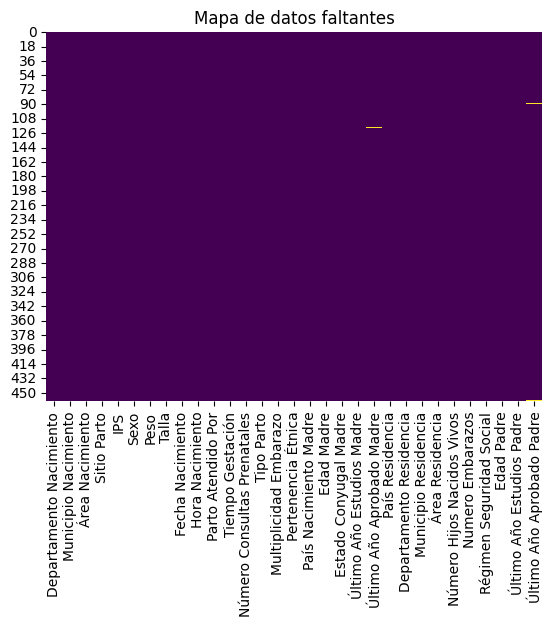


Número de filas después de eliminar datos faltantes: 457

Datos faltantes por columna después de la limpieza:
Departamento Nacimiento        0
Municipio Nacimiento           0
Área Nacimiento                0
Sitio Parto                    0
IPS                            0
Sexo                           0
Peso                           0
Talla                          0
Fecha Nacimiento               0
Hora Nacimiento                0
Parto Atendido Por             0
Tiempo Gestación               0
Número Consultas Prenatales    0
Tipo Parto                     0
Multiplicidad Embarazo         0
Pertenencia Étnica             0
País Nacimiento Madre          0
Edad Madre                     0
Estado Conyugal Madre          0
Último Año Estudios Madre      0
Último Año Aprobado Madre      0
País Residencia                0
Departamento Residencia        0
Municipio Residencia           0
Área Residencia                0
Número Hijos Nacidos Vivos     0
Numero Embarazos               

/tmp/ipython-input-563016307.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


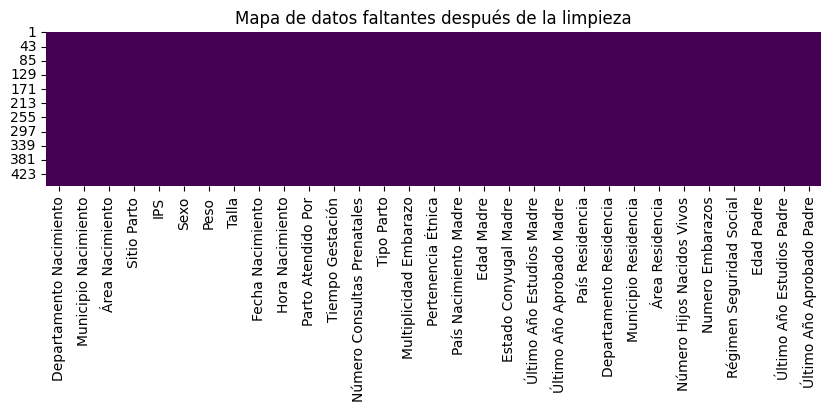

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("Base de Datos bebés.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("\nPrimeras filas del dataset")
print(df.head())
print("\nResumen estadístico del dataset")
print(df.describe())

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

In [ ]:
df_columnas=["Departamento Nacimiento","Municipio Nacimiento","Sexo","Peso","Edad Madre","Estado Conyugal Madre","Número Hijos Nacidos Vivos"]
print(df_filtrado[df_columnas].columns)
print("\nINFORMACION DEL SUNSET DEL DATASET")
print(df_filtrado[df_columnas].info)
print("\nPRIMERAS FILAS DEL DATASET")
print(df_filtrado[df_columnas].head())

Index(['Departamento Nacimiento', 'Municipio Nacimiento', 'Sexo', 'Peso',
       'Edad Madre', 'Estado Conyugal Madre', 'Número Hijos Nacidos Vivos'],
      dtype='object')

INFORMACION DEL SUNSET DEL DATASET
<bound method DataFrame.info of     Departamento Nacimiento Municipio Nacimiento       Sexo  Peso  Edad Madre  \
1           VALLE DEL CAUCA                 CALI   FEMENINO  2600          21   
2           VALLE DEL CAUCA              PALMIRA   FEMENINO  3480          26   
3           VALLE DEL CAUCA                 CALI   FEMENINO  3470          33   
4           VALLE DEL CAUCA              PALMIRA  MASCULINO  3895          20   
5           VALLE DEL CAUCA                 CALI  MASCULINO  3450          24   
..                      ...                  ...        ...   ...         ...   
455         VALLE DEL CAUCA                 CALI   FEMENINO  3060          27   
456         VALLE DEL CAUCA                 CALI  MASCULINO  3700          23   
457         VALLE DEL CAUCA   

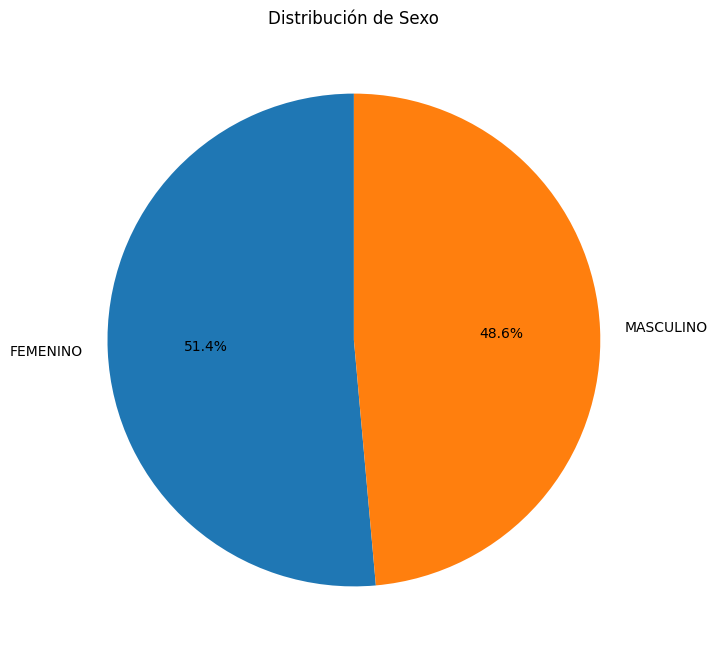

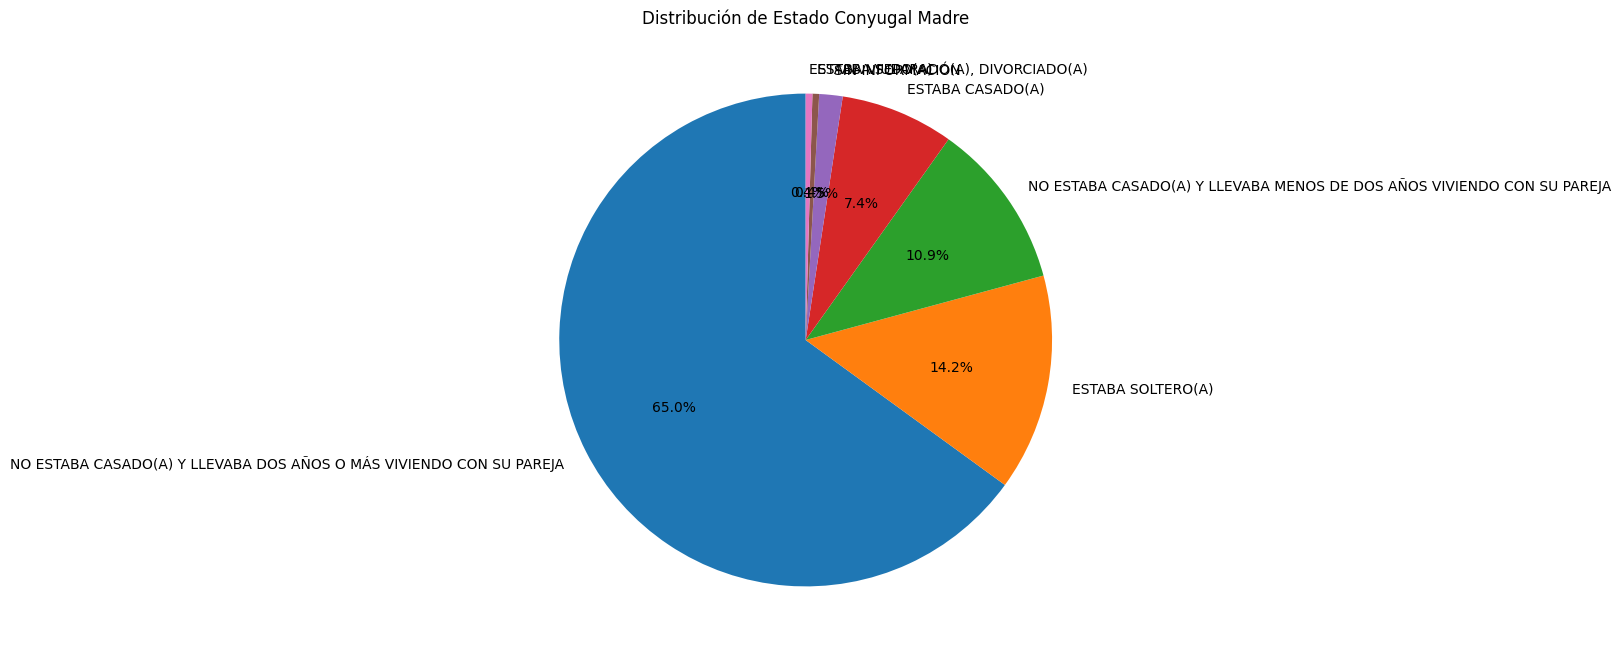

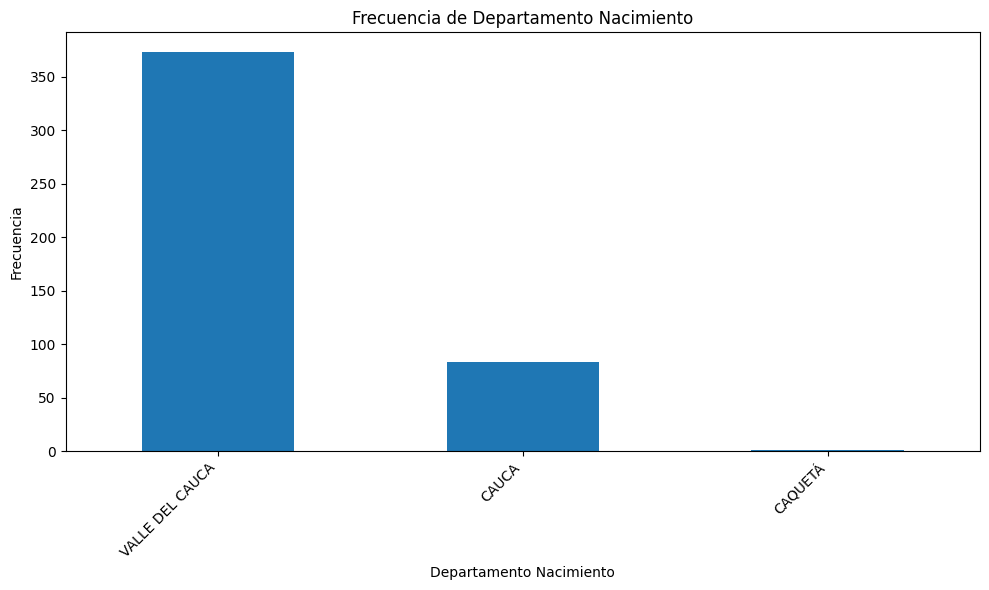

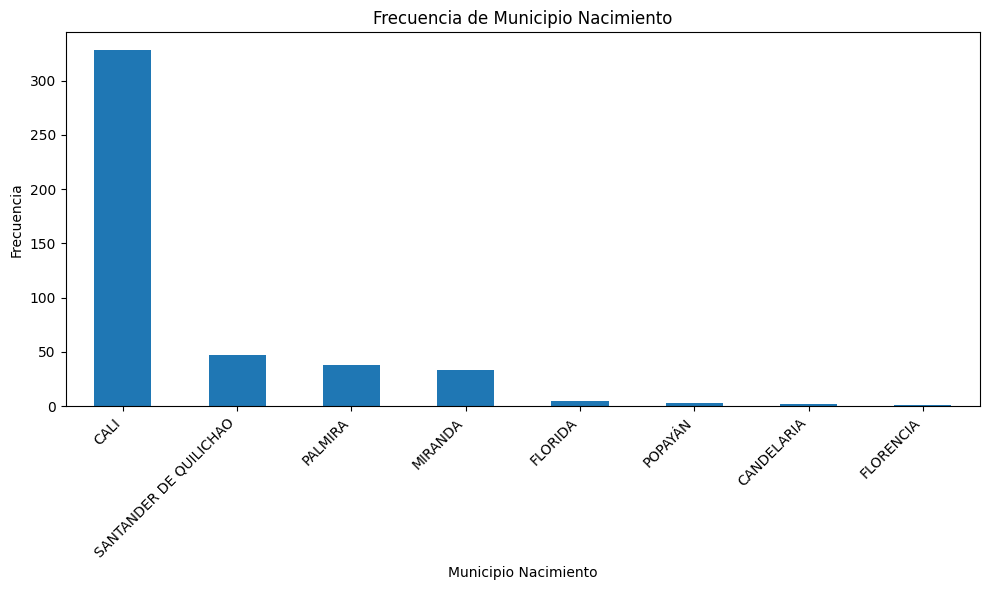

In [ ]:
# Diagramas de torta para variables categóricas seleccionadas
for column in ["Sexo", "Estado Conyugal Madre"]:
    plt.figure(figsize=(8, 8))
    df_filtrado[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de {column}')
    plt.ylabel('') # Eliminar la etiqueta del eje y para una mejor visualización del diagrama de torta
    plt.show()

# Diagramas de barras para variables categóricas seleccionadas
for column in ["Departamento Nacimiento", "Municipio Nacimiento"]:
    plt.figure(figsize=(10, 6))
    df_filtrado[column].value_counts().plot.bar()
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad
    plt.tight_layout()
    plt.show()

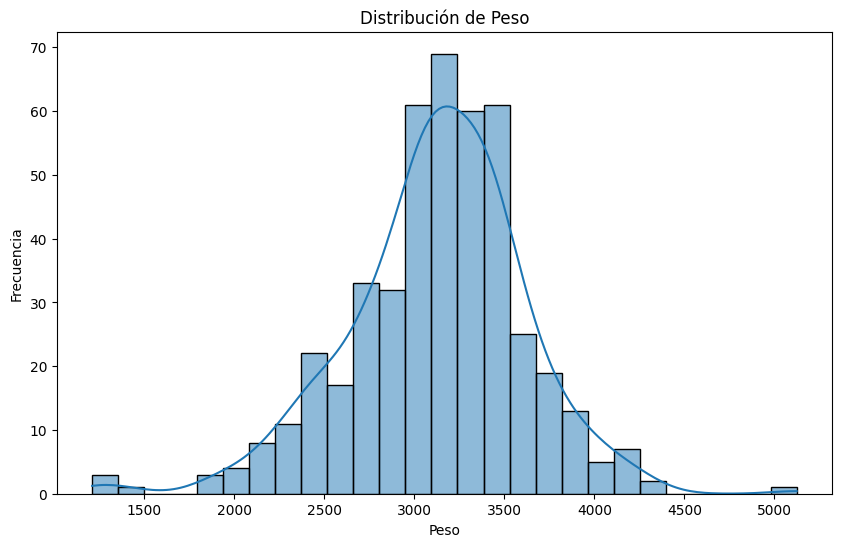

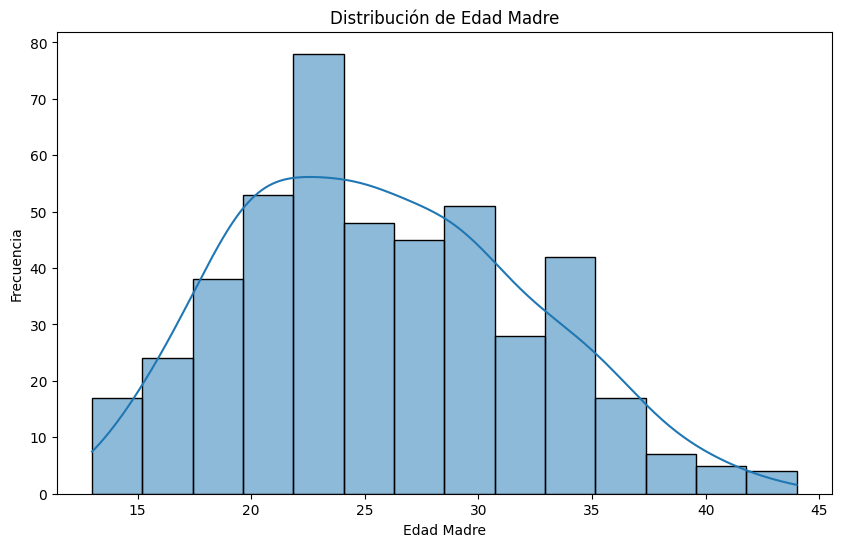

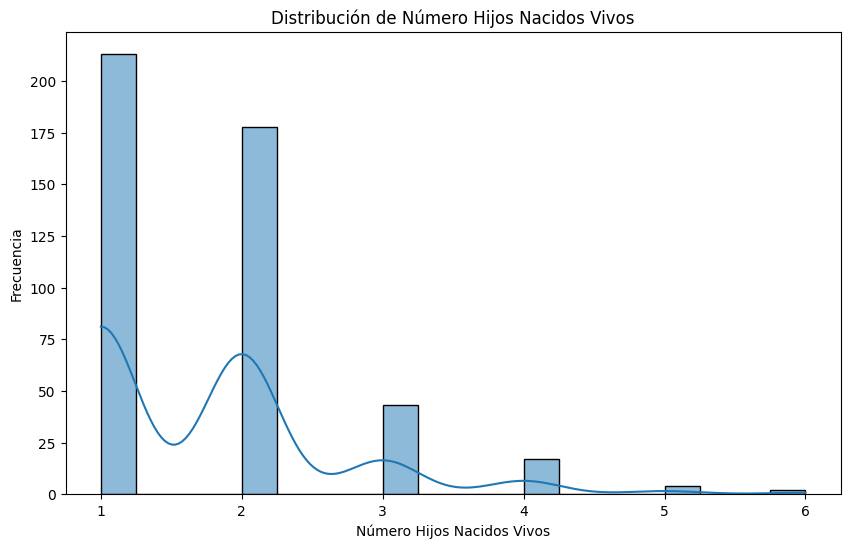

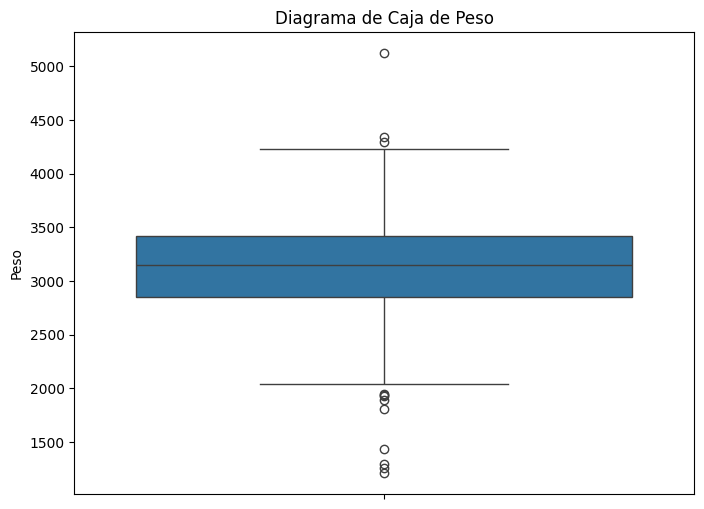

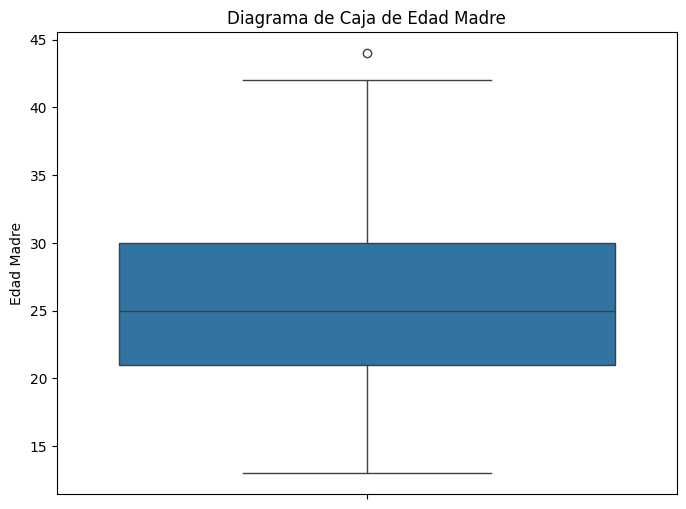

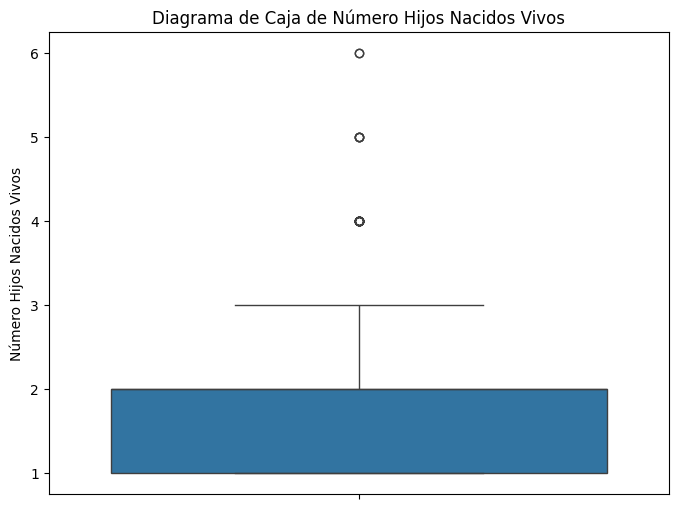

In [ ]:
# Histogramas para variables numéricas seleccionadas
for column in ["Peso", "Edad Madre", "Número Hijos Nacidos Vivos"]:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtrado[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Diagramas de caja para variables numéricas seleccionadas
for column in ["Peso", "Edad Madre", "Número Hijos Nacidos Vivos"]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_filtrado[column])
    plt.title(f'Diagrama de Caja de {column}')
    plt.ylabel(column)
    plt.show()

Se eliminaron 12 filas con datos atípicos en la columna 'Peso'
Se eliminaron 1 filas con datos atípicos en la columna 'Edad Madre'
Se eliminaron 22 filas con datos atípicos en la columna 'Número Hijos Nacidos Vivos'

Número de filas después de eliminar datos atípicos en todas las columnas numéricas: 422

Diagramas de caja después de eliminar datos atípicos:


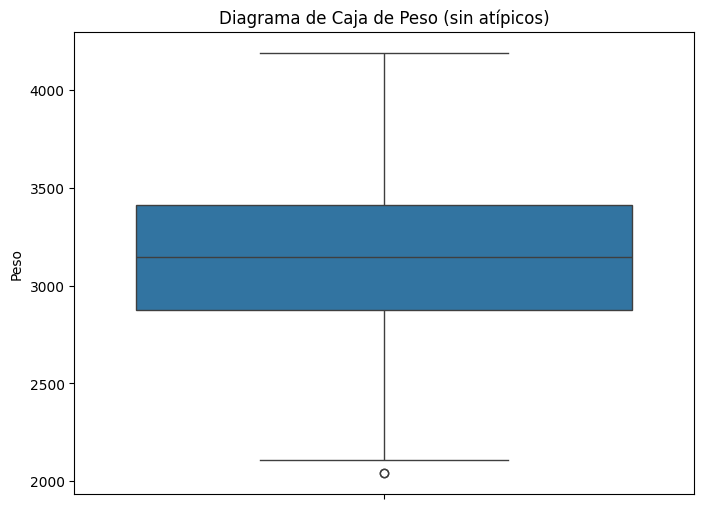

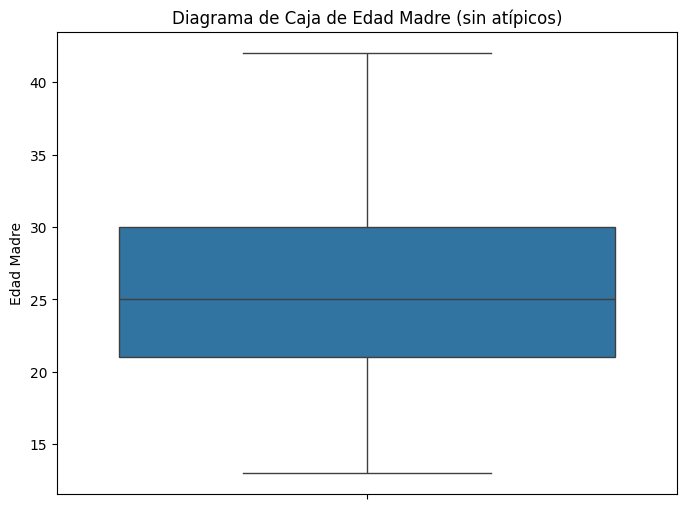

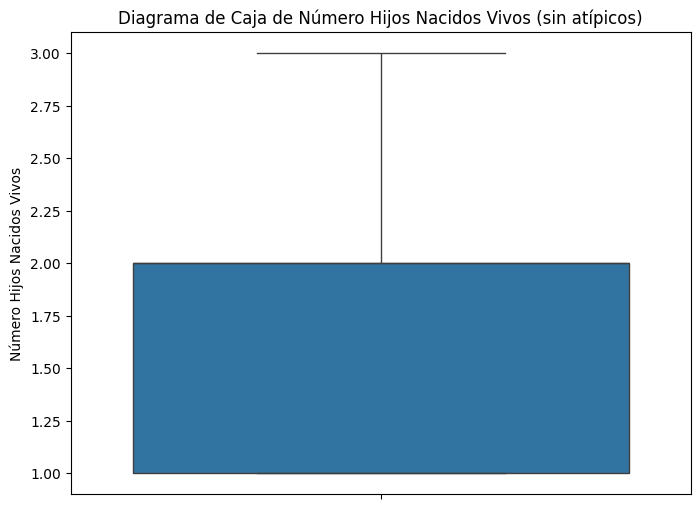

In [ ]:
# Función para eliminar datos atípicos usando el rango intercuartílico (IQR)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return df_cleaned

# Eliminar datos atípicos de las variables numéricas
df_cleaned = df_filtrado.copy()
numerical_columns = ["Peso", "Edad Madre", "Número Hijos Nacidos Vivos"]

for col in numerical_columns:
    initial_rows = df_cleaned.shape[0]
    df_cleaned = remove_outliers_iqr(df_cleaned, col)
    removed_rows = initial_rows - df_cleaned.shape[0]
    print(f"Se eliminaron {removed_rows} filas con datos atípicos en la columna '{col}'")

print(f"\nNúmero de filas después de eliminar datos atípicos en todas las columnas numéricas: {df_cleaned.shape[0]}")

# Opcional: Visualizar los diagramas de caja después de eliminar atípicos para verificar
print("\nDiagramas de caja después de eliminar datos atípicos:")
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Diagrama de Caja de {column} (sin atípicos)')
    plt.ylabel(column)
    plt.show()

Resultados de los tests de normalidad:

Columna: Peso
Shapiro-Wilk Test: Statistic=0.9915, p-value=0.0157
Kolmogorov-Smirnov Test: Statistic=1.0000, p-value=0.0000
Anderson-Darling Test: Statistic=1.0557
  At significance level 15.0%, data does not look normal (critical value = 0.5710)
  At significance level 10.0%, data does not look normal (critical value = 0.6500)
  At significance level 5.0%, data does not look normal (critical value = 0.7800)
  At significance level 2.5%, data does not look normal (critical value = 0.9100)
  At significance level 1.0%, data looks normal (critical value = 1.0820)
Jarque-Bera Test: Statistic=2.9179, p-value=0.2325

Columna: Edad Madre
Shapiro-Wilk Test: Statistic=0.9839, p-value=0.0001
Kolmogorov-Smirnov Test: Statistic=1.0000, p-value=0.0000
Anderson-Darling Test: Statistic=1.8686
  At significance level 15.0%, data does not look normal (critical value = 0.5710)
  At significance level 10.0%, data does not look normal (critical value = 0.6500)
  At

<Figure size 600x600 with 0 Axes>

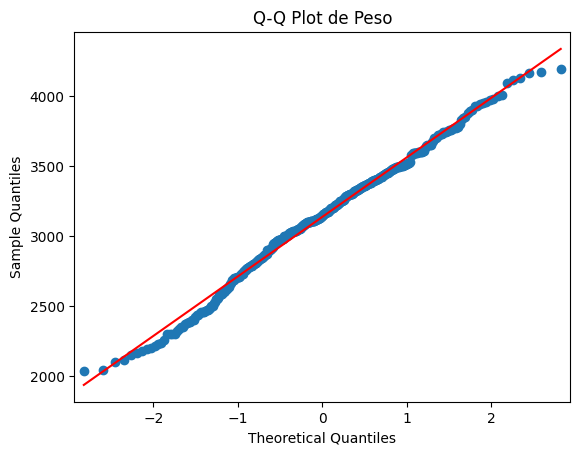

<Figure size 600x600 with 0 Axes>

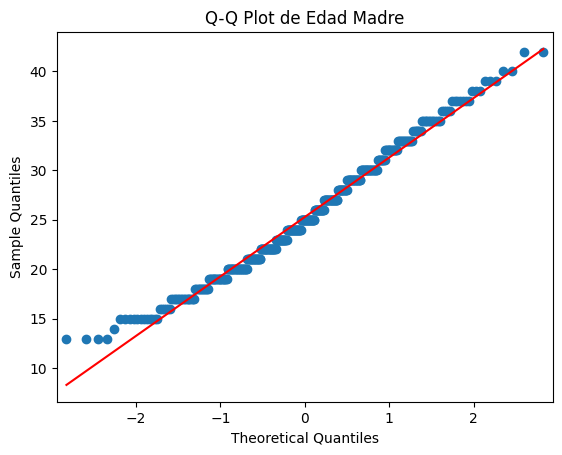

In [ ]:
from scipy.stats import shapiro, kstest, anderson, jarque_bera
import statsmodels.api as sm

numerical_columns = ["Peso", "Edad Madre"] # Assuming these are the continuous numerical variables after outlier removal

print("Resultados de los tests de normalidad:")
for col in numerical_columns:
    print(f"\nColumna: {col}")

    # Shapiro-Wilk Test
    stat_shapiro, p_shapiro = shapiro(df_cleaned[col])
    print(f"Shapiro-Wilk Test: Statistic={stat_shapiro:.4f}, p-value={p_shapiro:.4f}")

    # Kolmogorov-Smirnov Test (assuming a normal distribution for comparison)
    stat_kstest, p_kstest = kstest(df_cleaned[col], 'norm')
    print(f"Kolmogorov-Smirnov Test: Statistic={stat_kstest:.4f}, p-value={p_kstest:.4f}")

    # Anderson-Darling Test
    result_anderson = anderson(df_cleaned[col])
    print(f"Anderson-Darling Test: Statistic={result_anderson.statistic:.4f}")
    for i in range(len(result_anderson.critical_values)):
        sl, cv = result_anderson.significance_level[i], result_anderson.critical_values[i]
        if result_anderson.statistic < cv:
            print(f"  At significance level {sl:.1f}%, data looks normal (critical value = {cv:.4f})")
        else:
            print(f"  At significance level {sl:.1f}%, data does not look normal (critical value = {cv:.4f})")

    # Jarque-Bera Test
    stat_jarquebera, p_jarquebera = jarque_bera(df_cleaned[col])
    print(f"Jarque-Bera Test: Statistic={stat_jarquebera:.4f}, p-value={p_jarquebera:.4f}")

# Generar gráficos QQ
print("\nGráficos Q-Q:")
for col in numerical_columns:
    plt.figure(figsize=(6, 6))
    sm.qqplot(df_cleaned[col], line='s')
    plt.title(f'Q-Q Plot de {col}')
    plt.show()

Histogramas después de eliminar datos atípicos:


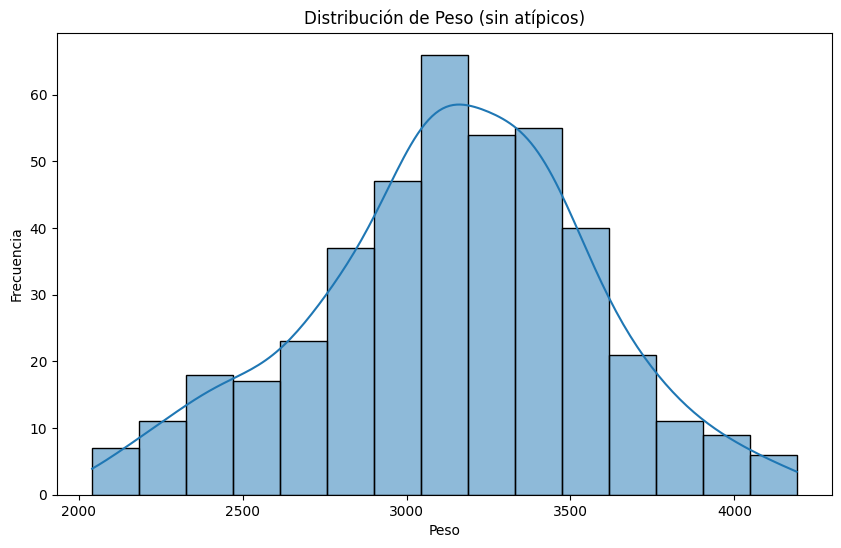

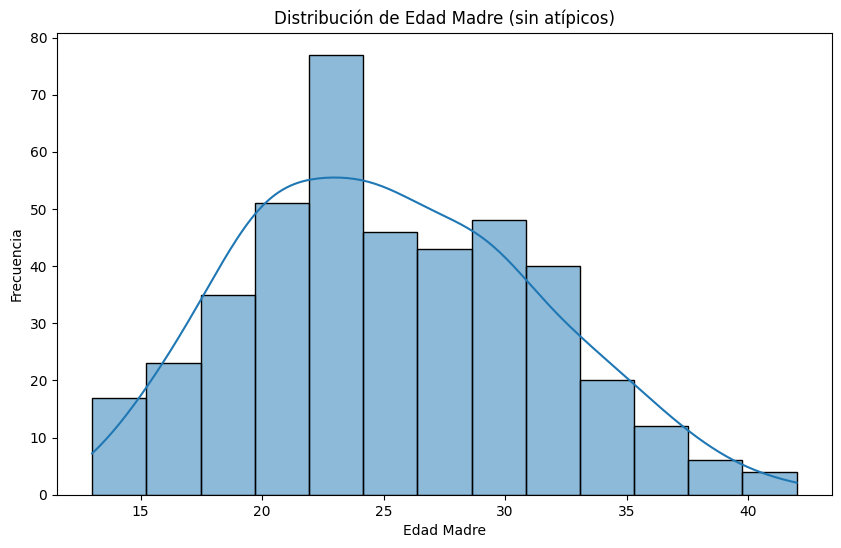

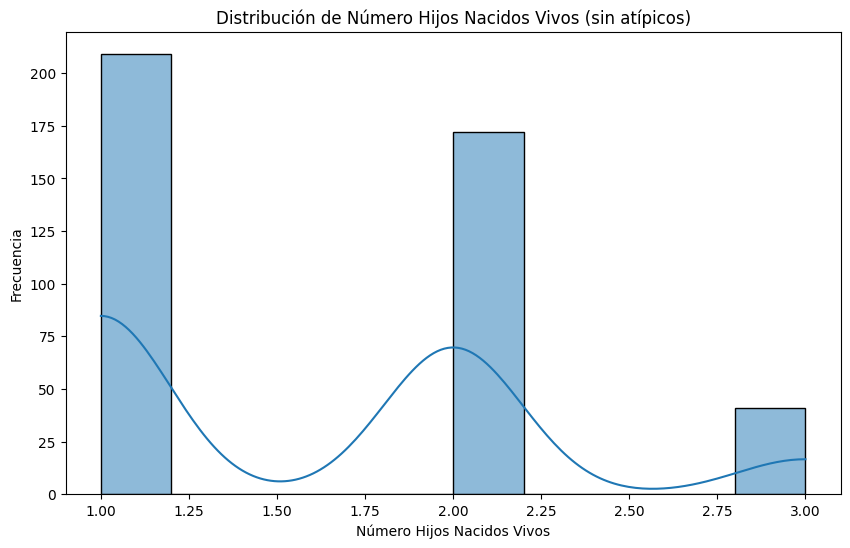

In [ ]:
# Histogramas para variables numéricas seleccionadas después de eliminar datos atípicos
numerical_columns = ["Peso", "Edad Madre", "Número Hijos Nacidos Vivos"]

print("Histogramas después de eliminar datos atípicos:")
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(f'Distribución de {column} (sin atípicos)')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()